In [ ]:
"""
Exploring measurement of a thing

Eliot Blennerhassett
"""

In [1]:
import numpy as np
import scipy as sp
import csv
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
x = []
y = []
with open('CB_Lobes.txt') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        x.append(int(row[0]))
        y.append(int(row[1]))

In [31]:
def graph_profile(y, title='Profile'):
    vel = np.diff(y)
    acc = np.diff(vel)    
    fig, (ax, ax1) = plt.subplots(2)
    ax2 = ax1.twinx()

    ax.plot(y, color='red')
    ax.grid(color='green')
    ax.set_ylabel('position (microns)')
    ax.set_title(title)

    ax1.plot(vel, color='purple')
    ax1.set_ylabel('velocity')
    ax1.grid(color='blue')

    ax2.plot(acc, color='orange')
    ax2.set_ylabel('acceleration')

    plt.show()

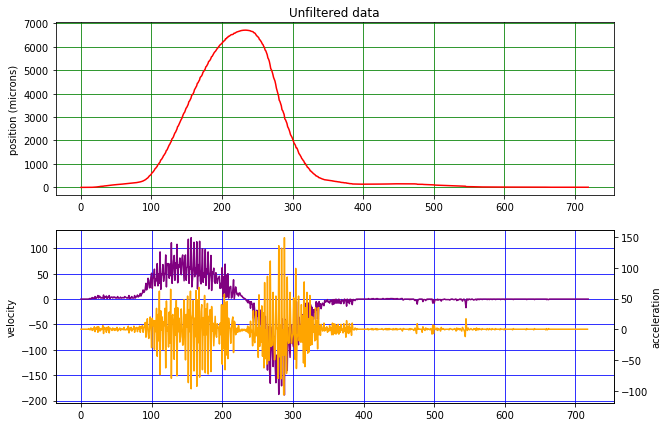

In [50]:
graph_profile(y, 'Unfiltered data')

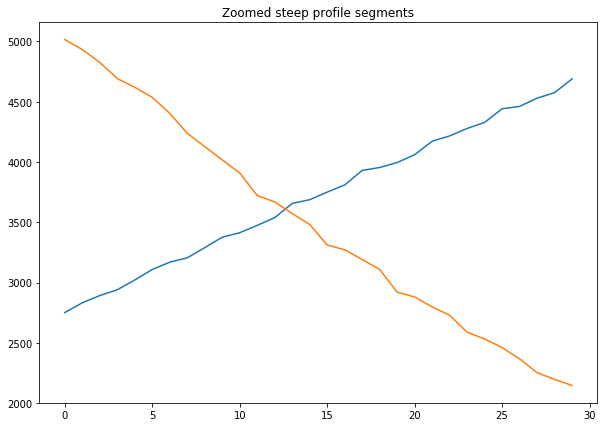

In [33]:
# Zoom in to show the jerky nature of the profile
plt.plot(y[140:170])
plt.plot(y[270:300])
plt.title('Zoomed steep profile segments')
plt.show()

In [34]:
# Low pass filter
filt_gains = (1, 1, 0, 0)
filt_bands = (0, 0.03, 0.1, 0.49999)
fir_remez = signal.remez(127, filt_bands, filt_gains[::2])

In [47]:
def graph_fir(fir, title='FIR filter'):
    freq, response = signal.freqz(fir)
    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(fir)
    ax1.set_title('Filter impulse response (coefficients)')
    ax1.grid()

    ax2.semilogy(0.5 * freq / np.pi, np.abs(response))
    ax2.grid()
    ax2.set_title('Filter Frequency Response')

    plt.show()

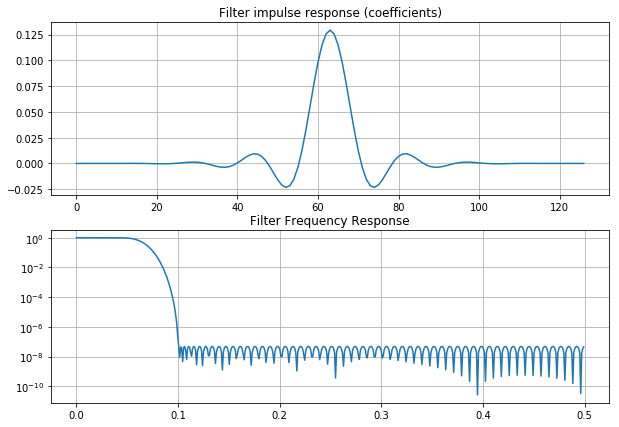

In [48]:
graph_fir(fir_remez)

In [36]:
y_f = np.convolve(y, fir_remez)  # _f for  filtered version

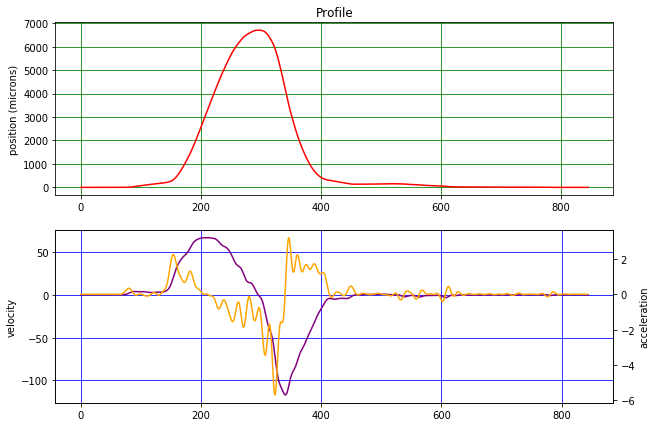

In [37]:
graph_profile(y_f)

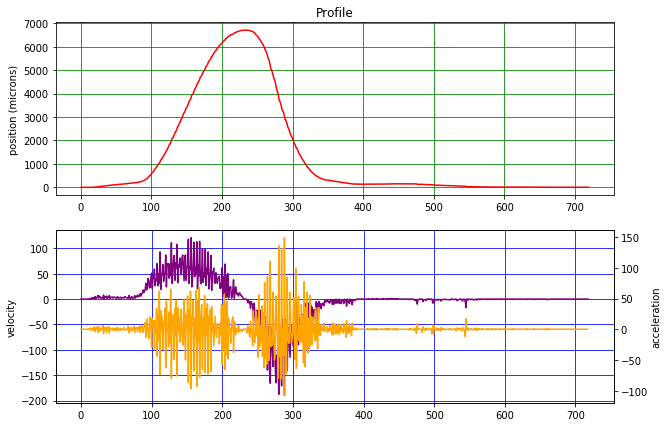

In [38]:
y_med = signal.medfilt(y, 11)  # Median filter... doesn't really help
graph_profile(y_med)

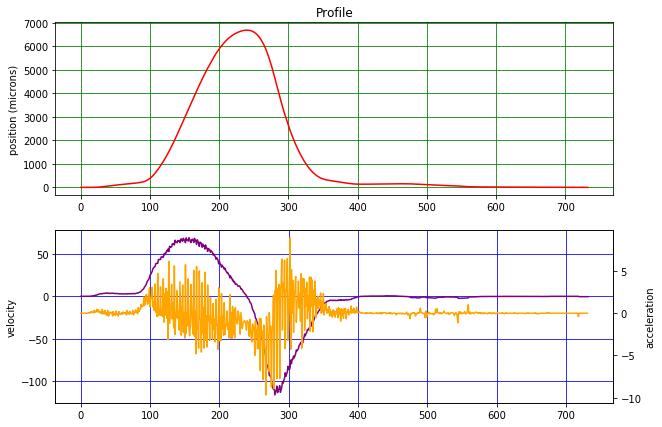

In [45]:
fir_avg = np.ones(15)/15
y_avg = np.convolve(y, fir_avg)
graph_profile(y_avg)

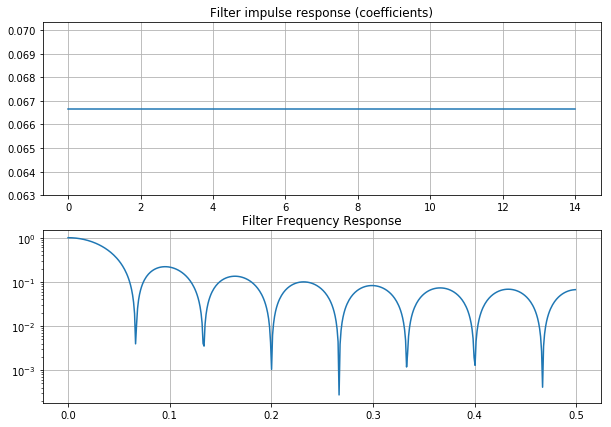

In [49]:
graph_fir(fir_avg)  # An averaging filter makes a bad low pass filter!

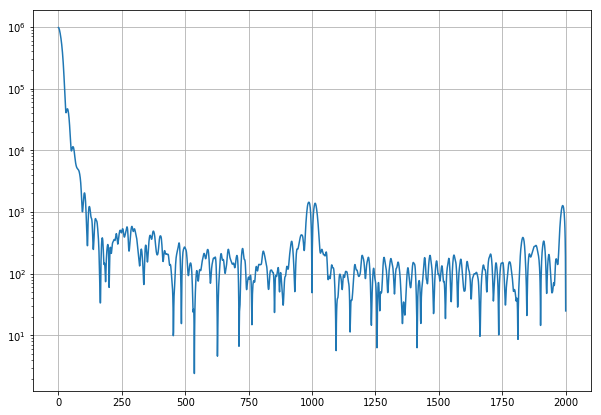

In [69]:
spec=np.fft.rfft(y,4000)
plt.semilogy(abs(spec))
plt.grid()